## Ruiz González Melissa Saraí
###### 12 de marzo de 2023

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Ejercicio de página 6

In [87]:
def buildMatrix(N,d):
    
    A = np.zeros((N,N))
    A[0,0] = d
    A[0,1] = -1
    A[-1,-2] = -1
    A[-1,-1] = d
    
    for i in range (1, N-1):
        A[i,i] = d
        A[i,i+1] = -1
        A[i,i-1] = -1
     
    return A

In [88]:
#parámetros físicos
L = 1.0 
K = 1
S = 0 
TA = 1
TB = 1

In [89]:
#parámetros numéricos
N = 23
x = np.linspace (0,L,N +2)
h = L/(N+1)
r = K / h **2
w = 2.5*np.pi
d = 2-w**2/r

In [90]:
T = np.zeros(N+2)
b = np.zeros(N)

In [91]:
b[:] = S / r 
T[0] = TA
T[-1] = TB
b[0] += TA
b[-1] += TB

In [92]:
A = buildMatrix (N, d)

In [93]:
T[1:N +1] = np.linalg.solve(A ,b)

### Ejercicio de página 9

In [85]:
def solExact(x, w):
    h = L/(N+1) 
    
    T = np.zeros(N+2)
    b = np.zeros(N)
    A = np.zeros((N,N)) 

    r = K / h**2
    b[:] = S / r 
    T[0] = TA
    T[-1] = TB
    b[0] += TA
    b[-1] += TB

    A = np.zeros((N,N))
    A[0,0] = d
    A[0,1] = -1
    A[-1,-2] = -1
    A[-1,-1] = d
    
    for i in range (1, N-1):
        A[i,i] = d
        A[i,i+1] = -1
        A[i,i-1] = -1

    T[1:N+1] =np.linalg.solve(A,b)
    
    return ((1.0-np.cos(w))/np.sin(w))*np.sin(w*x)+np.cos(w*x)

In [86]:
Error = np.linalg.norm(solExact(x,w)-T)
Error

0.1015529608288365

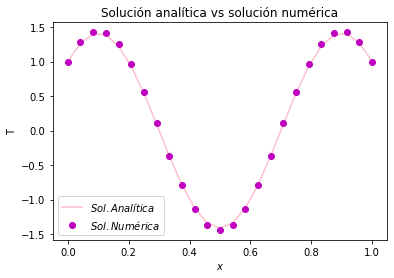

In [96]:
plt.plot(x,solExact(x,w), '-', color = 'pink', label='$Sol. Analítica$')
plt.plot(x,T, 'o', color = 'm', label='$Sol. Numérica$')
plt.xlabel('$x$')
plt.ylabel('T')
plt.title('Solución analítica vs solución numérica')
plt.legend()
plt.show()

### Ejercicio 1.3

Los coeficientes de la fórmula son: $A = 1 / 3h$, $B = 1/2h$ , $C = -1/h$ y $D = 1/6h$ de tal manera que la fórmula de diferencias queda como sigue:

$$
f^\prime = \frac{2 f_{i+1}+ 3 f_{i} - 6 f_{i-1} + f_{i-2}}{6h}
$$

In [97]:
# Definimos un arreglo con diferentes tamaños de h:
N = 6
h = np.array([1 / 2**i for i in range(0,N)])

# Definimos un arreglo con valores de 1.0 (donde evaluaremos el cos(x)):
x = np.ones(N)

In [98]:
#Cálculo de la derivada numérica hacia adelante
def forwardFD(u,x,h):
    return (u(x+h)-u(x))/h

In [99]:
#Cálculo de la derivada numérica hacia atrás
def backwardFD(u,x,h):
    return (u(x)-u(x-h))/h

In [100]:
#Cálculo de la derivada numérica centrada.
def centeredFD(u,x,h):
    return (u(x+h)-u(x-h))/(2*h)

In [101]:
#Aproximación con cuatro puntos.
def D3(u,x,h):
    """Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x)."""
    
    return (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h))/(6*h) 

In [102]:
#Aproximación con tres puntos (izquierda)
def D2izq(u,x,h):
    return (3*u(x)-4*u(x-h)+u(x-2*h))/(2*h)

In [103]:
#Aproximación con tres puntos (derecha)
def D2der(u,x,h):
    return (-3*u(x)+4*u(x+h)-u(x+(2*h)))/(2*h)

In [104]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ef = np.fabs(np.cos(x) - forwardFD(np.sin, x, h) )
eb = np.fabs(np.cos(x) - backwardFD(np.sin, x, h) )
ec = np.fabs( np.cos(x) - centeredFD(np.sin,x,h) )
e3 = np.fabs( np.cos(y) - D3(np.sin,y,h) )
e2l = np.fabs( np.cos(x) - D2l(np.sin,x,h) )
e2r = np.fabs( np.cos(x) - D2r(np.sin,x,h) )

In [105]:
# Metemos la información de h y del error en un Dataframe y mostramos el resultado
Error = pd.DataFrame(np.array([h,ef,eb,ec,e3,e2l,e2r]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$', '$D_{2i}$', '$D_{2r}$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$,$D_{2i}$,$D_{2r}$
0,1.00000,0.472476,0.301169,0.085654,0.043287,0.301169,0.054474
1,0.50000,0.228254,0.183789,0.022233,0.007314,0.066408,0.015967
2,0.25000,0.110248,0.099027,0.005611,0.001014,0.014265,0.007759
3,0.12500,0.053929,0.051118,0.001406,0.000132,0.003209,0.002389
4,0.06250,0.026639,0.025936,0.000352,0.000017,0.000754,0.000651
5,0.03125,0.013235,0.013059,0.000088,0.000002,0.000182,0.000169


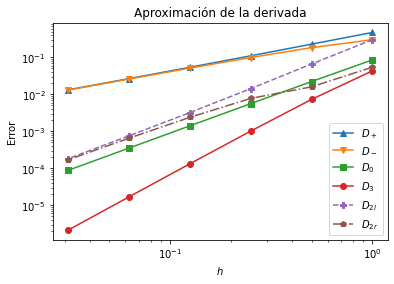

In [106]:
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h, e3, 'o-', label='$D_3$')
plt.plot(h, e2l, 'P--', label='$D_{2l}$')
plt.plot(h, e2r, 'p-.', label='$D_{2r}$')

plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog() 
plt.show()